There will be an overall grade for this assignment. To get a pass grade (grade 3), you need to pass items 1-3 below. To receive higher grades, finish items 4 and 5 as well.
In this assignment you will implement a Naïve Bayes classifier in Python that will classify emails into spam and non-spam (“ham”) classes. Your program should be able to train on a given set of spam and “ham” datasets.  
You will work with the datasets available at https://spamassassin.apache.org/old/publiccorpus/. There are three types of files in this location: 
•	easy-ham: non-spam messages typically quite easy to differentiate from spam messages. 
•	hard-ham: non-spam messages more difficult to differentiate
•	spam: spam messages
There are multiple folders for each category, download at least the first three, but results will be more stable the more data you have for each category. Read the “readme.html” for a full description of the file contents. 
The .bz2-file can be unzipped using the linux command
tar –xjvf file.bz2
which will result in a directory named “file”, containing all email messages as separate files. I suggest you uncompressed the files before trying to lead them into Python.


1.	Preprocessing: 
Note that the email files contain a lot of extra information, besides the actual message. Ignore that for now and run on the entire text. Further down (in the higher-grade part), you will be asked to filter out the headers and footers. 


In [ ]:
#import all packages
from sklearn.datasets import load_files
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import nltk
import email

from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


a.Load the text data into your Python program. Hint: look at the documentation for the sklearn.datasets.load_files function. Hint 2: use encoding=”latin-1”. Investigate how many emails are in each category and note this in your report.

In [ ]:
#use sklearn load_files to have data on easy ham vs spam
emails_easy_spam = load_files('./data/easy_ham _vs_spam_data/',encoding='latin-1')
#use sklearn load_files to have data on hard ham vs spam
emails_hard_spam = load_files('./data/hard_ham_vs_spam_data/',encoding='latin-1')

In [ ]:
np.bincount(emails_easy_spam.target)

array([2551,  501], dtype=int64)

2. b.	We don’t want to train and test on the same data. Split the spam and the ham datasets in a training set and a test set. Hint: look at the documentation for sklearn’s train_test_split() function

In [ ]:
#Split the spam and the ham datasets in a training set and a test set.
x_easy_spam_train, x_easy_spam_test, y_easy_spam_train, y_easy_spam_test = train_test_split(emails_easy_spam.data, emails_easy_spam.target, test_size=0.2, random_state=0)
x_hard_spam_train, x_hard_spam_test, y_hard_spam_train, y_hard_spam_test = train_test_split(emails_hard_spam.data, emails_hard_spam.target, test_size=0.2, random_state=0)

In [ ]:
# #### Alternative approach
# # load emails
# emails_easy = load_files('easy_ham_emails/',encoding='latin-1')
# emails_hard = load_files('hard_ham_emails/',encoding='latin-1')
# emails_spam = load_files('spam_emails/',encoding='latin-1')

In [ ]:
# # Split data
# # hamtrain,hamtest = train_test_split(emails_easy emails_hard, 
# #                                     test_size=0.2, random_state=0)
# spamtrain,spamtest = train_test_split(emails_spam.data, 
#                                       test_size=0.2, random_state=0)

# hardhamtrain,hardhamtest = train_test_split(emails_hard.data, 
#                                             test_size=0.2, random_state=0)
# easyhamtrain,easyhamtest = train_test_split(emails_easy.data, 
#                                             test_size=0.2, random_state=0)

In [ ]:
# emails_spam 

## Naive Bayes Classification

In [ ]:
def run_naiveBayes(ham_train, ham_test, spam_train, spam_test,model_name):
    CV = CountVectorizer()
    x_train = CV.fit_transform(ham_train)
    x_test = CV.transform(ham_test)
    y_train = spam_train.astype('int')
    if model_name == 'MultinomialNB':
        # Transform the data into vectors with CountVectorize
        # Train the multinomial NV
        model = MultinomialNB().fit(x_train, y_train)
#         #  predict spam or ham
#         y_pred = model.predict(x_test)
#         #calculate accuracy score
#         acc = accuracy_score(spam_test, y_pred)
#         #create confusion matrix
#         cm = confusion_matrix(spam_test, y_pred)
    elif model_name == 'BernoulliNB':
        # Transform the data into vectors with CountVectorizer with binary = True
        # Train the bernouilli NB
        model = BernoulliNB().fit(x_train, y_train)

    #  predict spam or ham
    y_pred = model.predict(x_test)
    #calculate accuracy score
    acc = accuracy_score(spam_test, y_pred)
    #create confusion matrix
    cm = confusion_matrix(spam_test, y_pred)
        
    cr = classification_report(spam_test,y_pred)

    return acc,cm,cr

## Discuss the differences between Multinomial Naive Bayes and Bernouilli Naive Bayes

## 3. Run the function you wrote in the previous question on
i.	Spam versus easy-ham (Multinomial Naive Bayes)


In [ ]:
accuracy,cfm,cr = run_naiveBayes(x_easy_spam_train, x_easy_spam_test, y_easy_spam_train, y_easy_spam_test,'MultinomialNB')

Text(240.00000000000017, 0.5, 'Actual label')

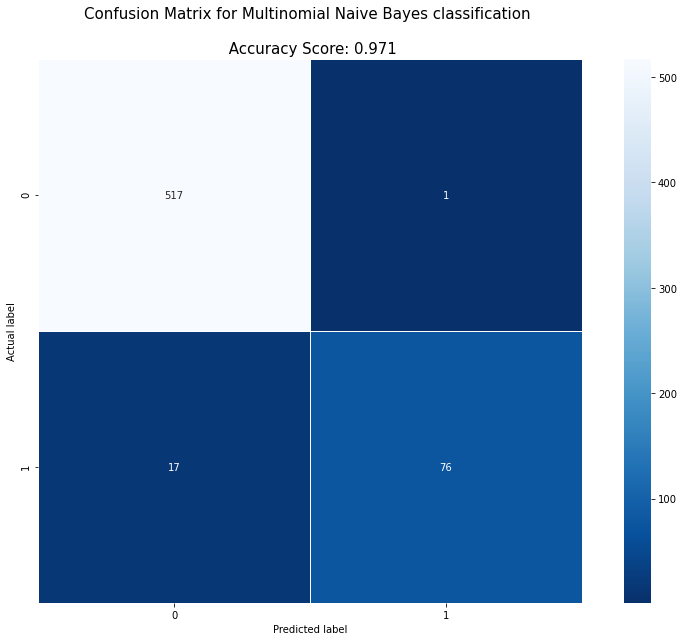

In [ ]:
# set plot size
plt.figure(figsize = (15, 10))

fig = sns.heatmap(cfm, annot = True, fmt = "d", linewidths = .5, square = True, cmap = "Blues_r")

# add plot title and axis labels
all_sample_title = "Confusion Matrix for Multinomial Naive Bayes classification \n\n Accuracy Score: %.3f" % accuracy
fig.set_title(all_sample_title, size = 15)
fig.set_xlabel("Predicted label")
fig.set_ylabel("Actual label")
# fig.xaxis.set_ticklabels(['Easy ham','Spam'])
# fig.yaxis.set_ticklabels(['Easy ham','Spam'])

In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       518
           1       0.99      0.82      0.89        93

    accuracy                           0.97       611
   macro avg       0.98      0.91      0.94       611
weighted avg       0.97      0.97      0.97       611



i.Spam versus easy-ham (Bernouilli Naive Bayes)


In [ ]:
accuracy2,cfm2,cr2= run_naiveBayes(x_easy_spam_train, x_easy_spam_test, y_easy_spam_train, y_easy_spam_test,'BernoulliNB')

[Text(0, 0.5, 'Easy ham'), Text(0, 1.5, 'Spam')]

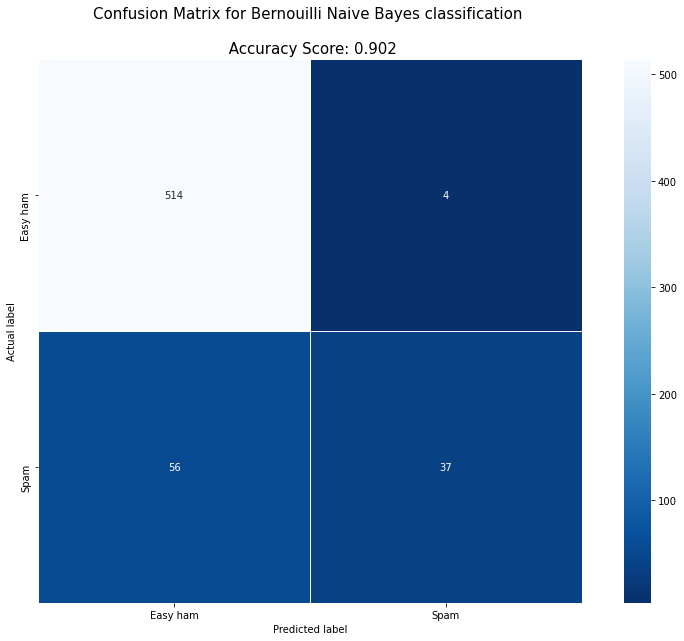

In [ ]:
# set plot size
plt.figure(figsize = (15, 10))

fig = sns.heatmap(cfm2, annot = True, fmt = "d", linewidths = .5, square = True, cmap = "Blues_r")

# add plot title and axis labels
all_sample_title = "Confusion Matrix for Bernouilli Naive Bayes classification \n\n Accuracy Score: %.3f" % accuracy2
fig.set_title(all_sample_title, size = 15)
fig.set_xlabel("Predicted label")
fig.set_ylabel("Actual label")
fig.xaxis.set_ticklabels(['Easy ham','Spam'])
fig.yaxis.set_ticklabels(['Easy ham','Spam'])

In [ ]:
print(cr2)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       518
           1       0.90      0.40      0.55        93

    accuracy                           0.90       611
   macro avg       0.90      0.70      0.75       611
weighted avg       0.90      0.90      0.89       611



ii) Spam versus hard-ham

In [ ]:
accuracy,cfm,cr = run_naiveBayes(x_hard_spam_train, x_hard_spam_test, y_hard_spam_train, y_hard_spam_test,'MultinomialNB')

[Text(0, 0.5, 'hard ham'), Text(0, 1.5, 'Spam')]

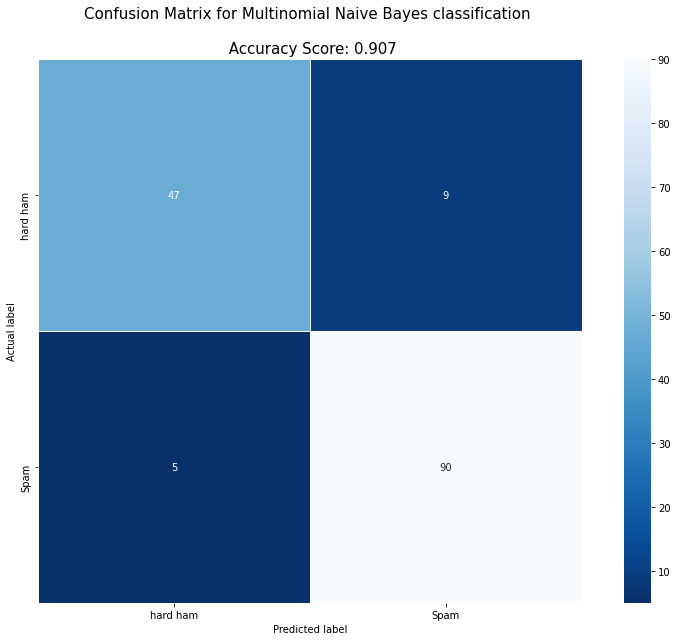

In [ ]:
# set plot size
plt.figure(figsize = (15, 10))

fig = sns.heatmap(cfm, annot = True, fmt = "d", linewidths = .5, square = True, cmap = "Blues_r")

# add plot title and axis labels
all_sample_title = "Confusion Matrix for Multinomial Naive Bayes classification \n\n Accuracy Score: %.3f" % accuracy
fig.set_title(all_sample_title, size = 15)
fig.set_xlabel("Predicted label")
fig.set_ylabel("Actual label")
fig.xaxis.set_ticklabels(['hard ham','Spam'])
fig.yaxis.set_ticklabels(['hard ham','Spam'])

In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        56
           1       0.91      0.95      0.93        95

    accuracy                           0.91       151
   macro avg       0.91      0.89      0.90       151
weighted avg       0.91      0.91      0.91       151



In [ ]:
accuracy,cfm,cr = run_naiveBayes(x_hard_spam_train, x_hard_spam_test, y_hard_spam_train, y_hard_spam_test,'BernoulliNB')

[Text(0, 0.5, 'hard ham'), Text(0, 1.5, 'Spam')]

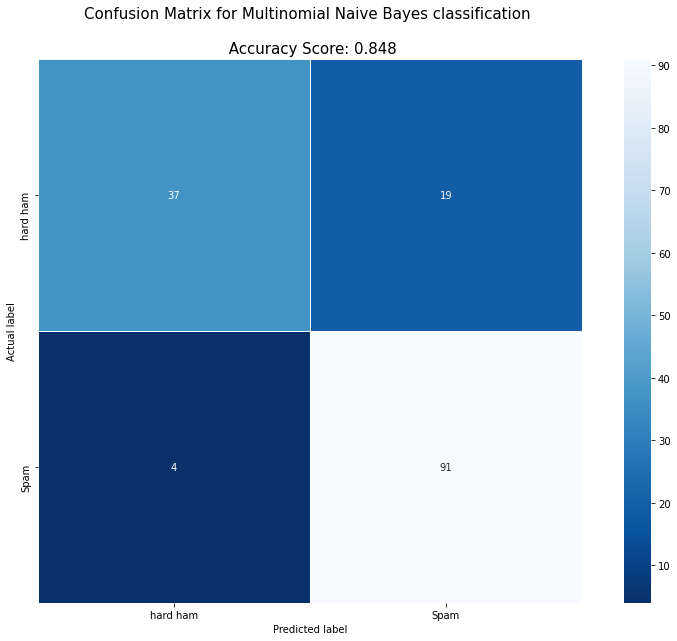

In [ ]:
# set plot size
plt.figure(figsize = (15, 10))

fig = sns.heatmap(cfm, annot = True, fmt = "d", linewidths = .5, square = True, cmap = "Blues_r")

# add plot title and axis labels
all_sample_title = "Confusion Matrix for Multinomial Naive Bayes classification \n\n Accuracy Score: %.3f" % accuracy
fig.set_title(all_sample_title, size = 15)
fig.set_xlabel("Predicted label")
fig.set_ylabel("Actual label")
fig.xaxis.set_ticklabels(['hard ham','Spam'])
fig.yaxis.set_ticklabels(['hard ham','Spam'])

In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.66      0.76        56
           1       0.83      0.96      0.89        95

    accuracy                           0.85       151
   macro avg       0.86      0.81      0.83       151
weighted avg       0.86      0.85      0.84       151



### Why is only reporting accuracy not a good idea in this case? 



### 4.	[For higher grades] To avoid classification based on common and uninformative words it is common to filter these out. 

a.	Argue why this may be useful. Try finding the words that are too common/uncommon in the dataset. 

Those words are known are stopwords. They occur in abundance in any human language. Stopwords refer to the words in any language which does not add much meaning to a sentence. By
removing the low-level information from our dataset,we can give more focus to the important information. As a result, removing stopwords may aid performance by reducing the number of tokens available to only the most important ones. Also removing stopwords decreases the size of the data, the training time also decreases with no discernible effect on the model's accuracy.

While libraries such as NLTK and Spacey have a corpus of stopwords which generalizes common words used in different languages, it will remove words such as  “the”, “is” and “and". But in sklearn, for CountVectorizer(which we will use in 3 (b),we have in-built parameter to control stopwords because they either : 


 * occurred in too many documents (max_df)
 * occurred in too few documents (min_df)
 * were cut off by feature selection (max_features).
 
If we use the stop_words = 'english' parameter in CountVectorize, sklearn acknowlegdes that there are several known issues with ‘english’ and to consider an alternative such as using (min_df,max_df) = (0,0.7). In 3 (b), we tried for the CountVectorizer() with (min_df,max_df) = (0,0.7), however if we want to optimize the model, we can perform hyperparameter tuning to obtain min_df and max_df values which give better results in terms of precision, recall or f1-score.



# To recomment code

In [ ]:
def get_top_n_words(corpus,order, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    """
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    if order == "common":
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    elif order == "uncommon":
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=False)

    return words_freq[:n]

In [ ]:
get_top_n_words(emails_easy_spam.data,"uncommon",10)

[('35de544174', 1),
 ('g7p0glz25869', 1),
 ('g7p0f2j13996', 1),
 ('mail217', 1),
 ('g7p0eej05587', 1),
 ('20020825004145', 1),
 ('mzzj23893', 1),
 ('1030236009', 1),
 ('27767', 1),
 ('limbo1', 1)]

In [ ]:
get_top_n_words(emails_easy_spam.data,"common",10)

[('com', 44818),
 ('to', 30781),
 ('the', 30119),
 ('from', 26055),
 ('2002', 25814),
 ('net', 21432),
 ('for', 20027),
 ('with', 19778),
 ('by', 19483),
 ('localhost', 18474)]

b.	Use the parameters in Sklearn’s CountVectorizer to filter out these words. Run the updated program on your data and record how the results differ from 3. You have two options to do this in Sklearn: either using the words found in part (a) or letting Sklearn do it for you

In [ ]:
def run_naiveBayes_2(ham_train, ham_test, spam_train, spam_test,model_name):
    CV = CountVectorizer(max_df=0.7,min_df=0)
    x_train = CV.fit_transform(ham_train)
    x_test = CV.transform(ham_test)
    y_train = spam_train.astype('int')
    if model_name == 'MultinomialNB':
        # Transform the data into vectors with CountVectorize
        # Train the multinomial NV
        model = MultinomialNB().fit(x_train, y_train)
#         #  predict spam or ham
#         y_pred = model.predict(x_test)
#         #calculate accuracy score
#         acc = accuracy_score(spam_test, y_pred)
#         #create confusion matrix
#         cm = confusion_matrix(spam_test, y_pred)
    elif model_name == 'BernoulliNB':
        # Transform the data into vectors with CountVectorizer with binary = True
        # Train the bernouilli NB
        model = BernoulliNB().fit(x_train, y_train)

    #  predict spam or ham
    y_pred = model.predict(x_test)
    #calculate accuracy score
    acc = accuracy_score(spam_test, y_pred)
    #create confusion matrix
    cm = confusion_matrix(spam_test, y_pred)
        
    cr = classification_report(spam_test,y_pred)

    return acc,cm,cr

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       518
           1       0.99      0.90      0.94        93

    accuracy                           0.98       611
   macro avg       0.99      0.95      0.97       611
weighted avg       0.98      0.98      0.98       611



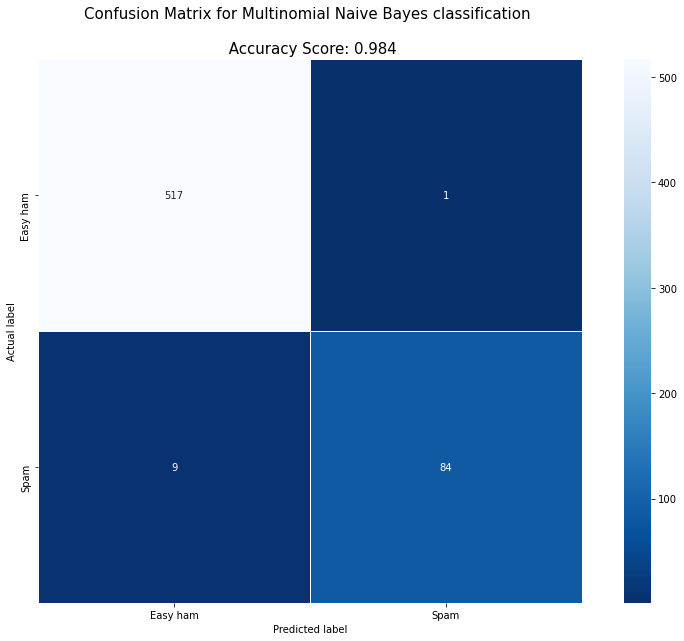

In [ ]:
accuracy,cfm,cr = run_naiveBayes_2(x_easy_spam_train, x_easy_spam_test, y_easy_spam_train, y_easy_spam_test,'MultinomialNB')
# set plot size
plt.figure(figsize = (15, 10))

fig = sns.heatmap(cfm, annot = True, fmt = "d", linewidths = .5, square = True, cmap = "Blues_r")

# add plot title and axis labels
all_sample_title = "Confusion Matrix for Multinomial Naive Bayes classification \n\n Accuracy Score: %.3f" % accuracy
fig.set_title(all_sample_title, size = 15)
fig.set_xlabel("Predicted label")
fig.set_ylabel("Actual label")
fig.xaxis.set_ticklabels(['Easy ham','Spam'])
fig.yaxis.set_ticklabels(['Easy ham','Spam'])
print(cr)

## To do for other cases

5.	[For higher grades] Filter out the headers and the footers of the emails before you run on them. The format may vary somewhat between emails, which can make this a bit tricky, so perfect filtering is not required. Run your program again and answer the following questions: 

We use this package from python to deal with emails (https://docs.python.org/3/library/email.message.html)

In [ ]:
def get_email_body(emailobj):
    """ 
    Return the body of the email in text by inputing email object
    """

    def _get_body(emailobj):
        """ 
        if email has multipart, return the first text/plain body else just regular payload
        """
        if emailobj.is_multipart():
            for payload in emailobj.get_payload():
                # If the message comes with a signature it can be that this
                # payload itself has multiple parts, so just return the
                # first one
                if payload.is_multipart():
                    return _get_body(payload)

                body = payload.get_payload()
                if payload.get_content_type() == "text/plain":
                    return body
        else:
            return emailobj.get_payload()

    body = _get_body(emailobj)


    return body 

### Easy ham vs spam data

In [ ]:
import email
# Parse the emails into a list email objects
emails = list(map(email.message_from_string, emails_easy_spam.data))

In [ ]:
body_easy_spam = []
for email in emails:
    body_easy_spam.append(get_email_body(email))
    

### Hard ham vs spam data

In [ ]:
emails = list(map(email.message_from_string, emails_hard_spam.data))

In [ ]:
import email
body_hard_spam = []
for email in emails:
    body_hard_spam.append(get_email_body(email))
    

When we filter out the headers and footers, we obtain some NoneType objects, hence we convert the filtered data into dataframes along with the targets so that we can drop those rows

In [ ]:
# assign data of lists.  
data = {'emails': body_easy_spam, 'target': emails_easy_spam.target}  
data2 = {'emails': body_hard_spam, 'target': emails_hard_spam.target}  

# Create DataFrame  
df_easy_spam = pd.DataFrame(data) 
df_hard_spam = pd.DataFrame(data2) 

#drop rows with Nan
df_easy_spam.dropna(inplace=True)
df_hard_spam.dropna(inplace=True)



In [ ]:
#Split the spam and the ham datasets in a training set and a test set.
x_easy_spam_train_filtered, x_easy_spam_test_filtered, y_easy_spam_train_filtered, y_easy_spam_test_filtered = train_test_split(df_easy_spam['emails'], df_easy_spam['target'], test_size=0.2, random_state=0)
x_hard_spam_train_filtered, x_hard_spam_test_filtered, y_hard_spam_train_filtered, y_hard_spam_test_filtered = train_test_split(df_hard_spam['emails'], df_hard_spam['target'], test_size=0.2, random_state=0)

In [ ]:
accuracy,cfm,cr = run_naiveBayes(x_easy_spam_train_filtered, x_easy_spam_test_filtered, y_easy_spam_train_filtered, y_easy_spam_test_filtered,'MultinomialNB')

[Text(0, 0.5, 'Easy ham'), Text(0, 1.5, 'Spam')]

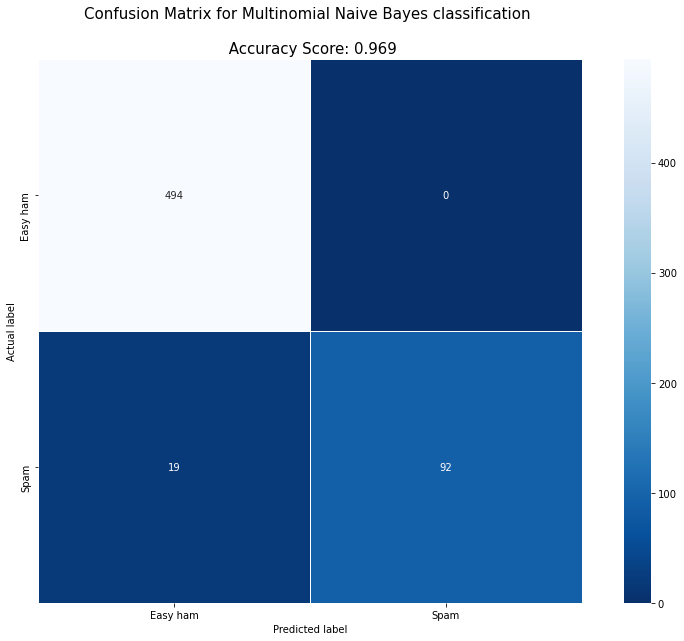

In [ ]:
# set plot size
plt.figure(figsize = (15, 10))

fig = sns.heatmap(cfm, annot = True, fmt = "d", linewidths = .5, square = True, cmap = "Blues_r")

# add plot title and axis labels
all_sample_title = "Confusion Matrix for Multinomial Naive Bayes classification \n\n Accuracy Score: %.3f" % accuracy
fig.set_title(all_sample_title, size = 15)
fig.set_xlabel("Predicted label")
fig.set_ylabel("Actual label")
fig.xaxis.set_ticklabels(['Easy ham','Spam'])
fig.yaxis.set_ticklabels(['Easy ham','Spam'])

In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       494
           1       1.00      0.85      0.92       111

    accuracy                           0.97       605
   macro avg       0.98      0.92      0.95       605
weighted avg       0.97      0.97      0.97       605



In [ ]:
accuracy,cfm,cr = run_naiveBayes(x_easy_spam_train_filtered, x_easy_spam_test_filtered, y_easy_spam_train_filtered, y_easy_spam_test_filtered,'BernoulliNB')

[Text(0, 0.5, 'Easy ham'), Text(0, 1.5, 'Spam')]

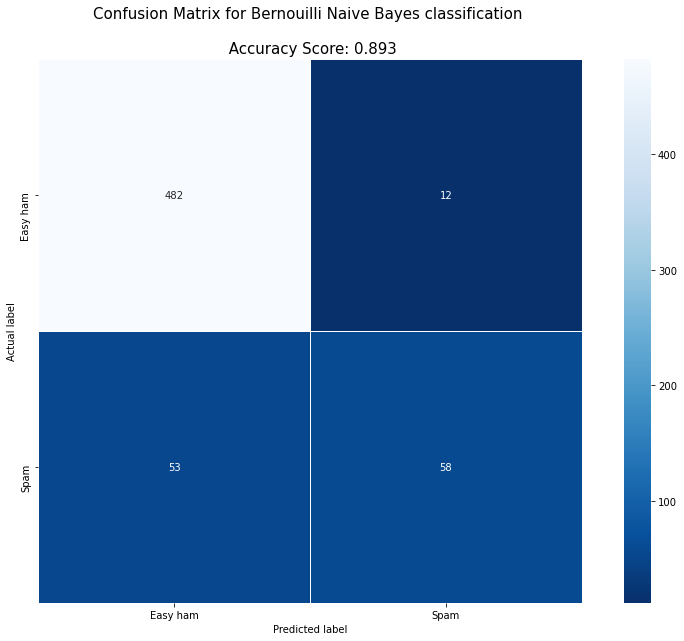

In [ ]:
# set plot size
plt.figure(figsize = (15, 10))

fig = sns.heatmap(cfm, annot = True, fmt = "d", linewidths = .5, square = True, cmap = "Blues_r")

# add plot title and axis labels
all_sample_title = "Confusion Matrix for Bernouilli Naive Bayes classification \n\n Accuracy Score: %.3f" % accuracy
fig.set_title(all_sample_title, size = 15)
fig.set_xlabel("Predicted label")
fig.set_ylabel("Actual label")
fig.xaxis.set_ticklabels(['Easy ham','Spam'])
fig.yaxis.set_ticklabels(['Easy ham','Spam'])

In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       494
           1       0.83      0.52      0.64       111

    accuracy                           0.89       605
   macro avg       0.86      0.75      0.79       605
weighted avg       0.89      0.89      0.88       605



In [ ]:
accuracy,cfm,cr = run_naiveBayes(x_hard_spam_train_filtered, x_hard_spam_test_filtered, y_hard_spam_train_filtered, y_hard_spam_test_filtered,'MultinomialNB')

[Text(0, 0.5, 'hard ham'), Text(0, 1.5, 'Spam')]

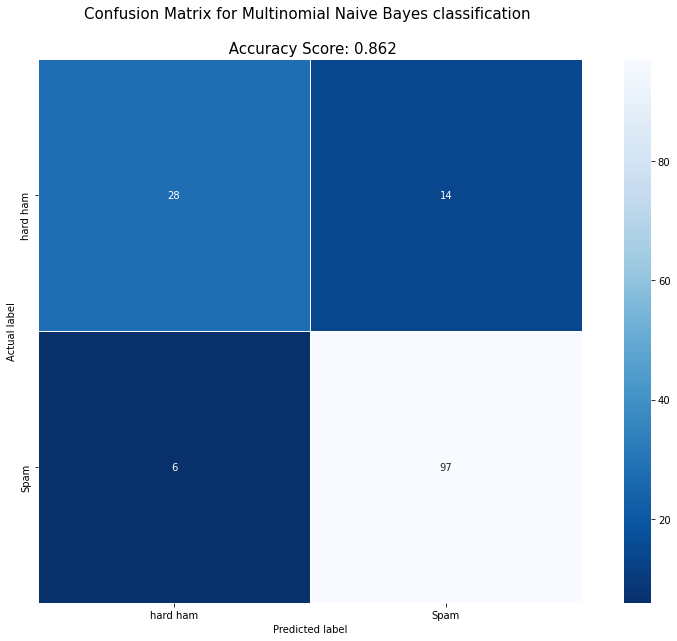

In [ ]:
# set plot size
plt.figure(figsize = (15, 10))

fig = sns.heatmap(cfm, annot = True, fmt = "d", linewidths = .5, square = True, cmap = "Blues_r")

# add plot title and axis labels
all_sample_title = "Confusion Matrix for Multinomial Naive Bayes classification \n\n Accuracy Score: %.3f" % accuracy
fig.set_title(all_sample_title, size = 15)
fig.set_xlabel("Predicted label")
fig.set_ylabel("Actual label")
fig.xaxis.set_ticklabels(['hard ham','Spam'])
fig.yaxis.set_ticklabels(['hard ham','Spam'])

In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.67      0.74        42
           1       0.87      0.94      0.91       103

    accuracy                           0.86       145
   macro avg       0.85      0.80      0.82       145
weighted avg       0.86      0.86      0.86       145



In [ ]:
accuracy,cfm,cr = run_naiveBayes(x_hard_spam_train_filtered, x_hard_spam_test_filtered, y_hard_spam_train_filtered, y_hard_spam_test_filtered,'BernoulliNB')

[Text(0, 0.5, 'hard ham'), Text(0, 1.5, 'Spam')]

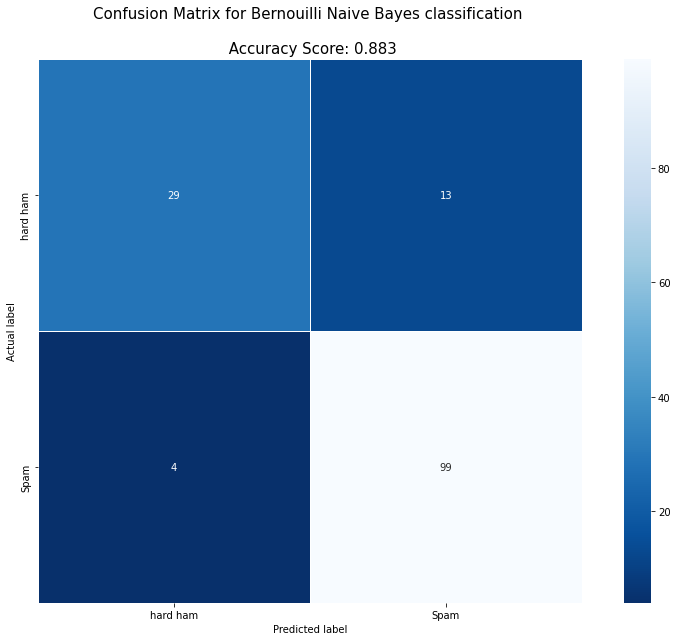

In [ ]:
# set plot size
plt.figure(figsize = (15, 10))

fig = sns.heatmap(cfm, annot = True, fmt = "d", linewidths = .5, square = True, cmap = "Blues_r")

# add plot title and axis labels
all_sample_title = "Confusion Matrix for Bernouilli Naive Bayes classification \n\n Accuracy Score: %.3f" % accuracy
fig.set_title(all_sample_title, size = 15)
fig.set_xlabel("Predicted label")
fig.set_ylabel("Actual label")
fig.xaxis.set_ticklabels(['hard ham','Spam'])
fig.yaxis.set_ticklabels(['hard ham','Spam'])

In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.69      0.77        42
           1       0.88      0.96      0.92       103

    accuracy                           0.88       145
   macro avg       0.88      0.83      0.85       145
weighted avg       0.88      0.88      0.88       145



5 a.	Does the result improve from 3 and 4?

No ......

b.	The split of the data set into a training set and a test set can lead to very skewed results. Why is this, and do you have suggestions on remedies?

Our training dataset is imbalanced, that is, a majority of the data is of one class which is ham.The class distribution is skewed, most machine learning algorithms will perform poorly and require modification to avoid simply predicting the majority class in all cases.

For instance, in our dataset we consider spam and ham emails. The training dataset consists mostly of ham emails,the model might be more inclined to predict ham since there are  more ham emails than spam emails. 

There are many ways to handle imbalanced datasets,below are few suggestions :
* Using SMOTE(Synthetic Minority Oversampling Technique) which generates synthetic samples for your imbalanced text data.  * Balancing the data with Oversampling techniques or undersampling the majority class.

* Use the stratify paramter when splitting the training and test set so that the output has a balanced distribution
* Assign class_weights as a parameter to your model's fit method, for instance increasing weights of minority classes




c.	What do you expect would happen if your training set were mostly spam messages while your test set were mostly ham messages?

The class distribution would again be imbalanced, however this time the results will be more skewed towards in the opposite direction (more likely to predict spam rather than ham) i.e there would be many more false positives where hams will be classified as spams